# **Unsupervised Learning**
Week 3 — Assignment 💻

# Setup 📋

In [1]:
# adds the project specific libs to the sys path
import sys
from pathlib import Path

proj_lib_path = str(Path.cwd().parent / 'libs')
if proj_lib_path not in sys.path:
    sys.path.insert(1, proj_lib_path)
    print(f'added {proj_lib_path} to the sys.path')

from supervised1.config import MODEL_DIR, DATA_DIR
import os   

CHAPTER_ID = "unsupervised_learning"
root_folder = os.path.join(DATA_DIR, CHAPTER_ID)
os.makedirs(root_folder, exist_ok=True)

print(f'models area at {MODEL_DIR}')
print(f'data is at {root_folder}')

added /Users/n0c09jf/code/github/tryml/projects/supervised1/libs to the sys.path
models area at /Users/n0c09jf/code/github/tryml/projects/supervised1/_models
data is at /Users/n0c09jf/code/github/tryml/projects/supervised1/_data/unsupervised_learning


In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
IMAGES_PATH = os.path.join(root_folder, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Exercises ✏️

## Cluster the Olivetti Faces Dataset

**The classic Olivetti faces dataset contains 400 grayscale 64 × 64–pixel images of faces. Each image is flattened to a 1D vector of size 4,096. 40 different people were photographed (10 times each), and the usual task is to train a model that can predict which person is represented in each picture. Load the dataset using the `sklearn.datasets.fetch_olivetti_faces()` function.**

In [3]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/n0c09jf/scikit_learn_data


dict_keys(['data', 'images', 'target', 'DESCR']) (400, 4096) (400, 64, 64)


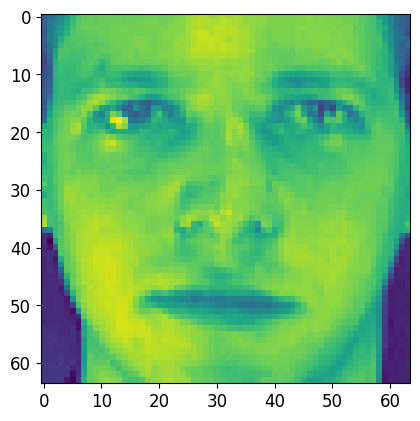

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

=================   =====================
Classes              

In [11]:
print(olivetti.keys(), olivetti.data.shape, olivetti.images.shape)
plt.imshow(olivetti.images[0])
plt.show()
print(olivetti.DESCR)

In [5]:
olivetti.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

**Then split it into a training set, a validation set, and a test set (note that the dataset is already scaled between 0 and 1). Since the dataset is quite small, you probably want to use stratified sampling to ensure that there are the same number of images per person in each set.**

In [17]:
from sklearn.model_selection import train_test_split

X = olivetti.data
y = olivetti.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=123)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=123)
print(X_train.shape, X_valid.shape, X_test.shape)

# normalize the data
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_valid = std_scaler.transform(X_valid)
X_test = std_scaler.transform(X_test)

(288, 4096) (32, 4096) (80, 4096)


To speed things up, we'll reduce the data's dimensionality using PCA:

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99, random_state=123)
X_train_pca = pca.fit_transform(X_train)
print(X_train.shape, X_train_pca.shape)

X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

(288, 4096) (288, 204)


**Next, cluster the images using K-Means, and ensure that you have a good number of clusters.**

In [33]:
from sklearn.cluster import KMeans

k_range = range(5, 150, 5)
kmeans_per_k = []
for k in k_range:
    print("k={}".format(k))
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train_pca)
    kmeans_per_k.append(kmeans)

k=5
k=10
k=15
k=20
k=25
k=30
k=35
k=40
k=45
k=50
k=55
k=60
k=65
k=70
k=75
k=80
k=85
k=90
k=95
k=100
k=105
k=110
k=115
k=120
k=125
k=130
k=135
k=140
k=145


silhoutte_score = (b-a)/max(a,b), where

a: is the mean distance to the other instances in the same cluster

b: mean nearest-cluster distance

In [34]:
from sklearn.metrics import silhouette_score

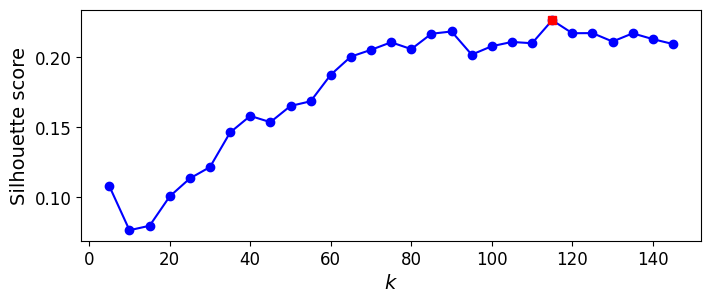

In [35]:
# from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train_pca, model.labels_)
                     for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()

In [36]:
best_k

115

You may end up with the best number of clusters being quite high. You might have expected it to be 40, since there are 40 different people on the pictures. However, the same person may look quite different on different pictures (e.g., with or without glasses, or simply shifted left or right).

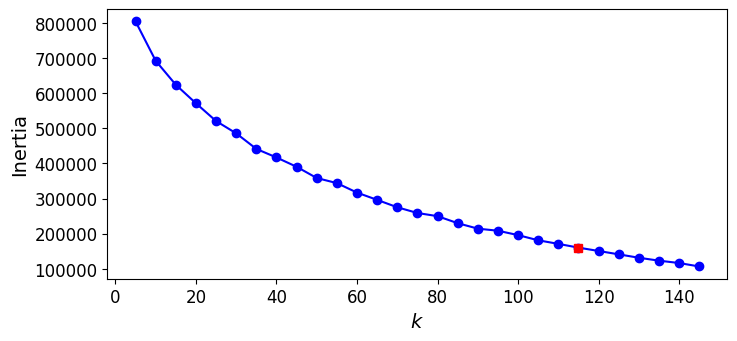

In [37]:
inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.plot(best_k, best_inertia, "rs")
plt.show()

The optimal number of clusters is not clear on this inertia diagram, as there is no obvious elbow, so let's stick with $k=100$.

In [38]:
best_model = kmeans_per_k[best_index]

**Visualize the clusters: do you see similar faces in each cluster?**

Cluster 0


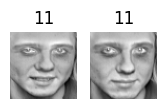

Cluster 1


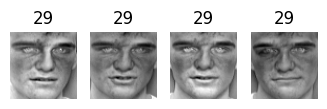

Cluster 2


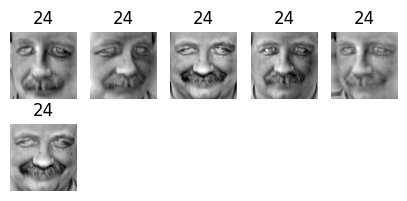

Cluster 3


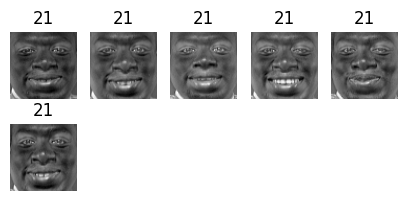

Cluster 4


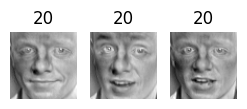

Cluster 5


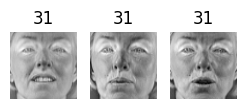

Cluster 6


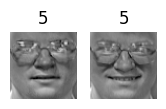

Cluster 7


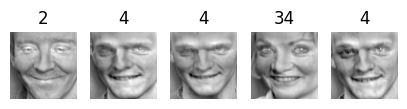

Cluster 8


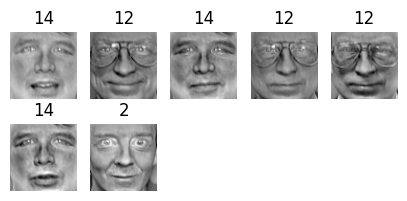

Cluster 9


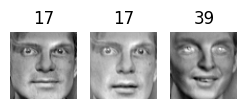

Cluster 10


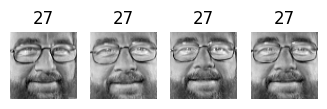

Cluster 11


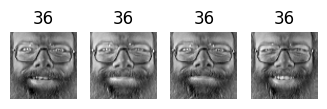

Cluster 12


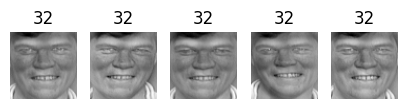

Cluster 13


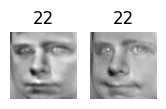

Cluster 14


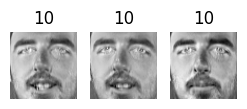

Cluster 15


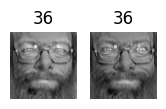

Cluster 16


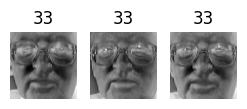

Cluster 17


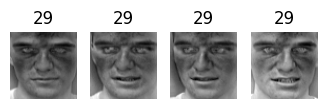

Cluster 18


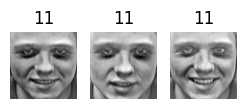

Cluster 19


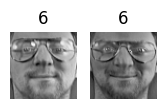

Cluster 20


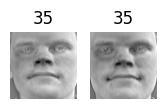

Cluster 21


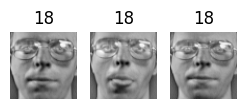

Cluster 22


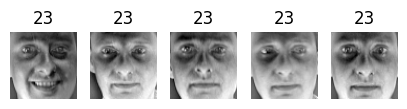

Cluster 23


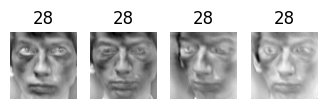

Cluster 24


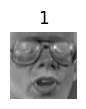

Cluster 25


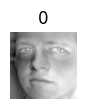

Cluster 26


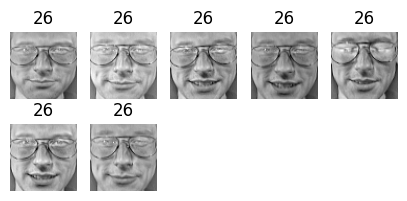

Cluster 27


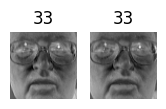

Cluster 28


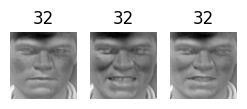

Cluster 29


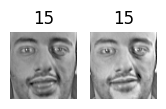

Cluster 30


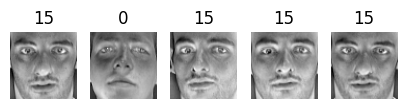

Cluster 31


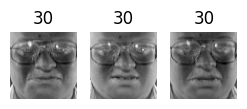

Cluster 32


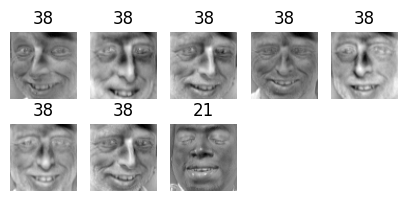

Cluster 33


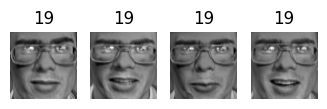

Cluster 34


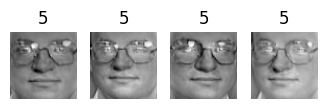

Cluster 35


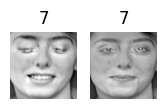

Cluster 36


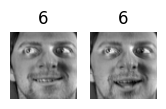

Cluster 37


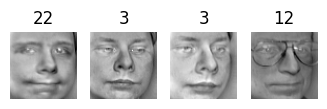

Cluster 38


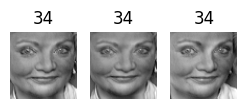

Cluster 39


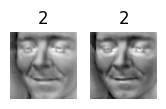

Cluster 40


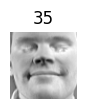

Cluster 41


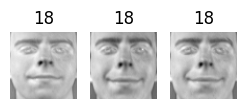

Cluster 42


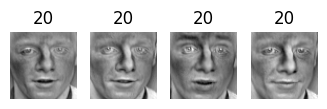

Cluster 43


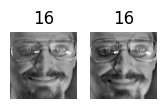

Cluster 44


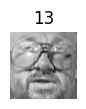

Cluster 45


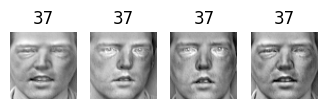

Cluster 46


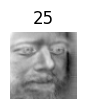

Cluster 47


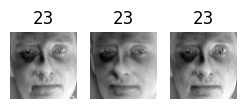

Cluster 48


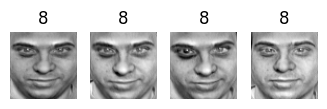

Cluster 49


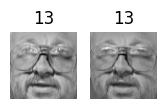

Cluster 50


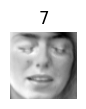

Cluster 51


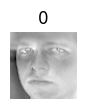

Cluster 52


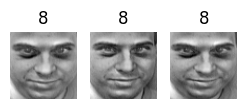

Cluster 53


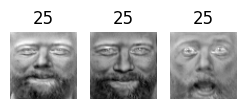

Cluster 54


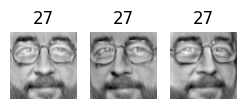

Cluster 55


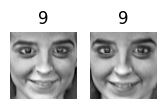

Cluster 56


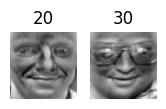

Cluster 57


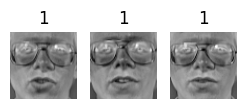

Cluster 58


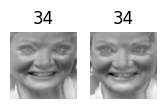

Cluster 59


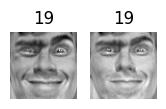

Cluster 60


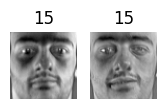

Cluster 61


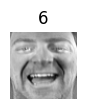

Cluster 62


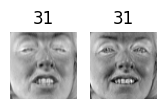

Cluster 63


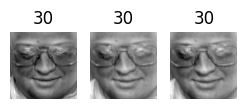

Cluster 64


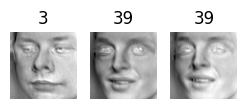

Cluster 65


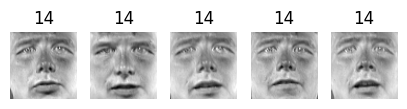

Cluster 66


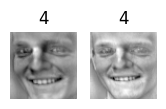

Cluster 67


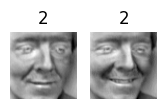

Cluster 68


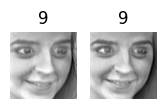

Cluster 69


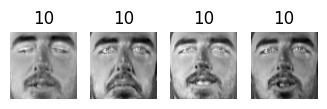

Cluster 70


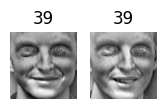

Cluster 71


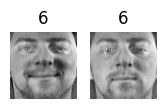

Cluster 72


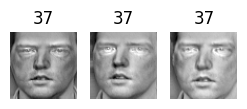

Cluster 73


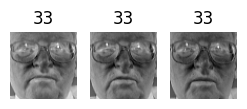

Cluster 74


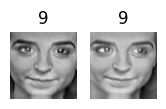

Cluster 75


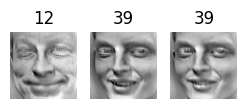

Cluster 76


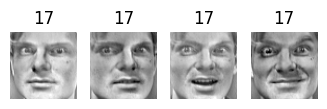

Cluster 77


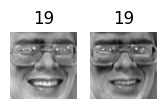

Cluster 78


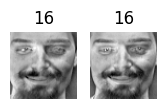

Cluster 79


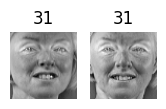

Cluster 80


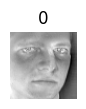

Cluster 81


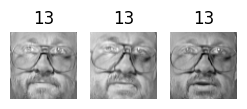

Cluster 82


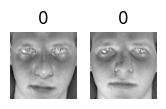

Cluster 83


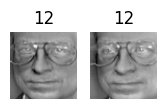

Cluster 84


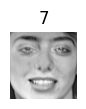

Cluster 85


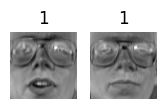

Cluster 86


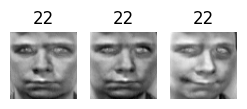

Cluster 87


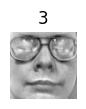

Cluster 88


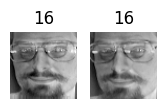

Cluster 89


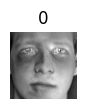

Cluster 90


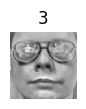

Cluster 91


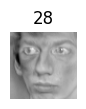

Cluster 92


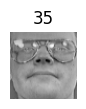

Cluster 93


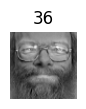

Cluster 94


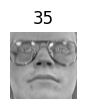

Cluster 95


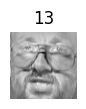

Cluster 96


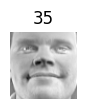

Cluster 97


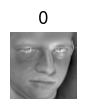

Cluster 98


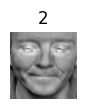

Cluster 99


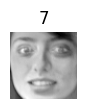

Cluster 100


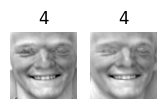

Cluster 101


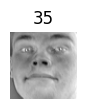

Cluster 102


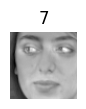

Cluster 103


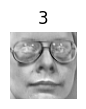

Cluster 104


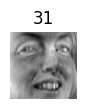

Cluster 105


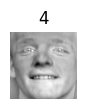

Cluster 106


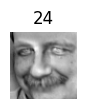

Cluster 107


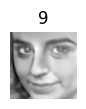

Cluster 108


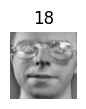

Cluster 109


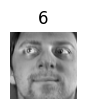

Cluster 110


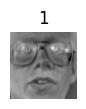

Cluster 111


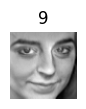

Cluster 112


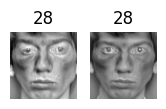

Cluster 113


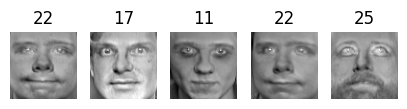

Cluster 114


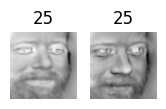

In [39]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

Do the clusters tend to have "intruders", or are all the images of the same person for most clusters?

Clustering images this way may be too imprecise to be directly useful when training a model (as we will see below), but it can be tremendously useful when labeling images in a new dataset: it will usually make labelling much faster.

## Using Clustering as Preprocessing for Classification

**Continuing with the Olivetti faces dataset, train a classifier to predict which person is represented in each picture, and evaluate it on the validation set.**

In [40]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=150, max_features=None, random_state=42)
clf.fit(X_train_pca, y_train)
clf.score(X_valid_pca, y_valid)

0.875

**Next, use K-Means as a dimensionality reduction tool, and train a classifier on the reduced set.**

In [41]:
X_train_reduced = best_model.transform(X_train_pca)
X_valid_reduced = best_model.transform(X_valid_pca)
X_test_reduced = best_model.transform(X_test_pca)

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_reduced, y_train)

clf.score(X_valid_reduced, y_valid)

0.71875

Any better? Let's see if tuning the number of clusters helps.

**Search for the number of clusters that allows the classifier to get the best performance: what performance can you reach?**

We could use a `GridSearchCV`, but since we already have a validation set, we don't need K-fold cross-validation, and we're only exploring a single hyperparameter, so it's simpler to just run a loop manually:

In [42]:
from sklearn.pipeline import Pipeline

for n_clusters in k_range:
    pipeline = Pipeline([
        ("kmeans", KMeans(n_clusters=n_clusters, random_state=42)),
        ("forest_clf", RandomForestClassifier(n_estimators=150, max_features=None, random_state=42))
    ])
    pipeline.fit(X_train_pca, y_train)
    print(n_clusters, pipeline.score(X_valid_pca, y_valid))

5 0.34375
10 0.59375
15 0.6875
20 0.59375
25 0.625
30 0.59375
35 0.625
40 0.65625
45 0.71875
50 0.71875
55 0.71875
60 0.65625
65 0.6875
70 0.75
75 0.75
80 0.75
85 0.75
90 0.71875
95 0.6875
100 0.6875
105 0.75
110 0.78125
115 0.71875
120 0.65625
125 0.6875
130 0.65625
135 0.625
140 0.65625
145 0.625


What's the accuracy now, having tuned the number of clusters? Are the distances to the cluster centroids as informative as the original images?

**What if you append the features from the reduced set to the original features (again, searching for the best number of clusters)?**

In [43]:
X_train_extended = np.c_[X_train_pca, X_train_reduced]
X_valid_extended = np.c_[X_valid_pca, X_valid_reduced]
X_test_extended = np.c_[X_test_pca, X_test_reduced]

print(X_train_pca.shape, X_train_reduced.shape, X_train_extended.shape)

(288, 204) (288, 115) (288, 319)


In [44]:
clf = RandomForestClassifier(n_estimators=150, max_features=None, random_state=42)
clf.fit(X_train_extended, y_train)
clf.score(X_valid_extended, y_valid)

0.71875

Are the clusters useful to directly train a classifier in this case? What about for helping label new training instances?

In [50]:
from sklearn.metrics import accuracy_score

# predicting label based on cluster grouping with max label count!

label_cluster_map = dict()
for l, c in zip(y_train, best_model.labels_):
    if c in label_cluster_map:
        if l in label_cluster_map[c]:
            label_cluster_map[c][l] += 1
        else:
            label_cluster_map[c][l] = 1
    else:
        label_cluster_map[c] = {l: 1}

for c in label_cluster_map:
    max_l = None
    max_count = 0
    for l, count in label_cluster_map[c].items():
        if max_count < count:
            max_l = l
            max_count = count
    label_cluster_map[c] = l

y_test_cluster = best_model.predict(X_test_pca)
y_test_pred = [ label_cluster_map[t_c] for t_c in y_test_cluster ]

accuracy_score(y_test, y_test_pred)

0.75

the classifier has 87.5% whereas other alternatives didn't help in improving the accuracy it stayed at 71.8% but finetuning on number of clusters yeilded max of 75% accuracy for some clusters.

# Using clustering for semi-supervised learning

In [51]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.int64)

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mnist['data'], mnist['target'], random_state=42)

In [53]:
X_train.shape

(52500, 784)

## Logistic regression with only 50 labeled instances

In [55]:
from sklearn import linear_model
from sklearn.model_selection import StratifiedShuffleSplit

n_labeled = 50

log_reg = linear_model.LogisticRegression(multi_class='ovr', penalty='l2', solver='lbfgs', random_state=42)

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=50)
train_idx, test_idx = next(strat_split.split(X_train, y_train))

log_reg.fit(X_train[test_idx], y_train[test_idx])
log_reg.score(X_test, y_test)

/Users/n0c09jf/miniconda3/envs/supervised1_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


0.6223428571428572

In [56]:
X_test.shape

(17500, 784)

## Clustering

In [66]:
k = 50

kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
print(X_digits_dist.shape)

representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

(52500, 50)


In [58]:
X_representative_digits.shape

(50, 784)

In [59]:
y_train[representative_digit_idx] # y_representative_digits

array([2, 1, 9, 4, 7, 6, 0, 3, 6, 5, 2, 6, 7, 5, 0, 9, 3, 7, 4, 9, 0, 9,
       1, 2, 3, 6, 3, 1, 6, 0, 5, 7, 5, 9, 8, 4, 7, 0, 0, 8, 0, 1, 4, 3,
       0, 8, 2, 9, 6, 6])

In [60]:
y_representative_digits = y_train[representative_digit_idx]

In [61]:
log_reg = linear_model.LogisticRegression(multi_class='ovr', penalty='l2', solver='lbfgs', random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

/Users/n0c09jf/miniconda3/envs/supervised1_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


0.7690285714285714

# Propagating labels

In [68]:
#percentile_closest = 50 # actually doing: propagating labels to all other instances in same cluster

y_train_propagated = np.empty(len(X_train))
for i in range(k):
  y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

In [86]:
log_reg = linear_model.LogisticRegression(multi_class='ovr', penalty='l2', max_iter=5000, solver='lbfgs', random_state=42)
log_reg.fit(X_train[:27000], y_train_propagated[:27000])
log_reg.score(X_test, y_test)

/Users/n0c09jf/miniconda3/envs/supervised1_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/n0c09jf/miniconda3/envs/supervised1_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7982285714285714

## 50p closet points to cluster centroids for training

In [83]:
percentile_closest = 50

#X point to assigned cluster distance
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]

for i in range(k):
  in_cluster = (kmeans.labels_ == i)
  X_incluster_dist = X_cluster_dist[in_cluster]
  cutoff_distance = np.percentile(X_incluster_dist, percentile_closest)
  above_cutoff = (X_cluster_dist > cutoff_distance)
  X_cluster_dist[in_cluster & above_cutoff] = -1

partly_propagated = (X_cluster_dist != -1)
X_train_partly_propagated = X_train[partly_propagated]
y_train_partly_propagated = y_train[partly_propagated]

log_reg = linear_model.LogisticRegression(multi_class='ovr', penalty='l2', max_iter=5000, solver='lbfgs', random_state=42)
log_reg.fit(X_train_partly_propagated, y_train_partly_propagated)
log_reg.score(X_test, y_test)

/Users/n0c09jf/miniconda3/envs/supervised1_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/n0c09jf/miniconda3/envs/supervised1_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8696571428571429